# Death rate in Poland

Źródła danych:
* [Biuletyn Statystyczny Nr 2020.02 - TABL. 7   STAN I RUCH NATURALNY LUDNOŚCI](https://stat.gov.pl/files/gfx/portalinformacyjny/pl/defaultaktualnosci/5498/4/97/1/tabl7_stan_i_ruch_naturalny_ludnosci.xlsx)

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

# Get plots with higher resolution
%config InlineBackend.figure_format = 'retina'

# Default styling for plots
sns.set(style="white", palette="muted", color_codes=True)

In [2]:
filepath = os.path.join('..', 'data', 'poland', '2020.02_tabl7_stan_i_ruch_naturalny_ludnosci.xlsx')
df = pd.read_excel(filepath)

In [3]:
# drop useless rows/observations
df = df.drop([0, 1, 2, 3, 4, 5])

# choose data we want to analyze
df = df[['LUDNOŚĆ', 'Unnamed: 21']]
df.columns = ['period', 'death_rate_per_1000']

In [4]:
df['period'] = df['period'].str.replace(' XII',  '.12')
df['period'] = df['period'].str.replace(' XI',   '.11')
df['period'] = df['period'].str.replace(' X',    '.10')
df['period'] = df['period'].str.replace(' IX',   '.09')
df['period'] = df['period'].str.replace(' VIII', '.08')
df['period'] = df['period'].str.replace(' VII',  '.07')
df['period'] = df['period'].str.replace(' VI',   '.06')
df['period'] = df['period'].str.replace(' V',    '.05')
df['period'] = df['period'].str.replace(' IV',   '.04')
df['period'] = df['period'].str.replace(' III',  '.03')
df['period'] = df['period'].str.replace(' II',   '.02')
df['period'] = df['period'].str.replace(' I',    '.01')

from pandas.tseries.offsets import MonthEnd
df['period'] = pd.to_datetime(df['period'], format="%Y.%m") + MonthEnd(1)
df['month'] = pd.to_datetime(df['period'], format="%Y.%m").dt.month
#df

In [5]:
df['death_rate_per_1000'] = df['death_rate_per_1000'].astype(float)
df = df.set_index('period')
df

,death_rate_per_1000,month
period,,
2010-01-31,10.6,1
2010-02-28,9.3,2
2010-03-31,10.0,3
2010-04-30,9.7,4
2010-05-31,9.9,5
...,...,...
2019-09-30,10.1,9
2019-10-31,10.7,10
2019-11-30,9.9,11


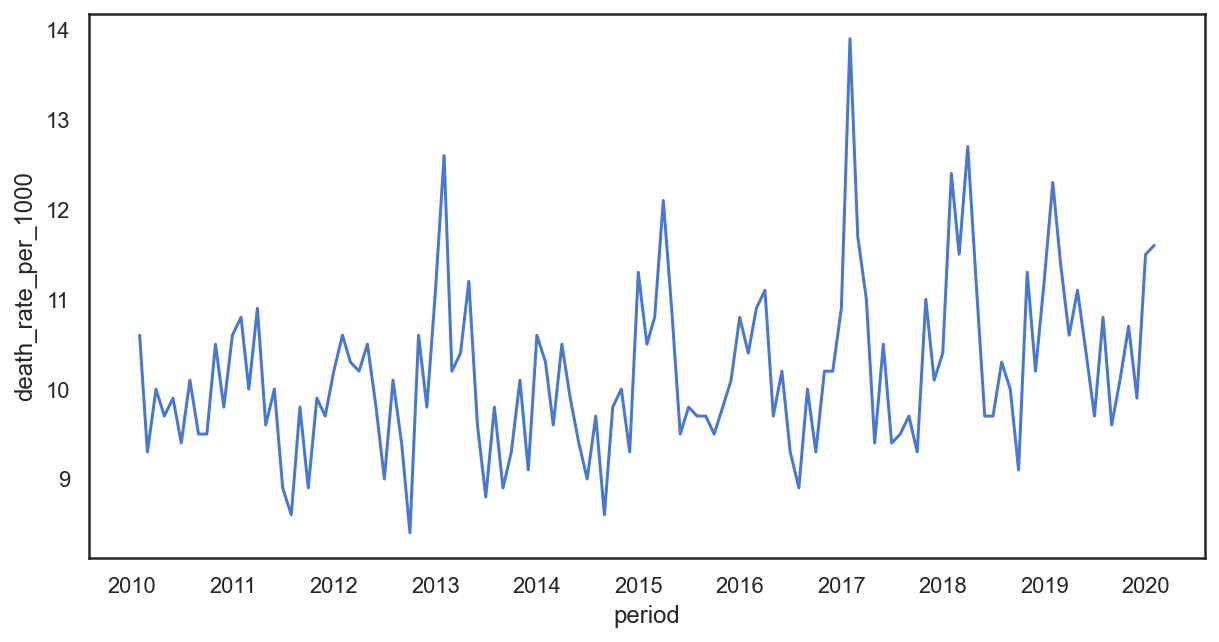

In [6]:
fig, axs = plt.subplots(1,1, figsize=(10,5))
sns.lineplot(x=df.index, y='death_rate_per_1000', data=df, ax=axs);

> Komentarz: Widoczna sezonowość - w okresach zimowych większa ilość zgonów, a w okresach letnich - mniejsza.

In [7]:
df_monthly_stats = df['death_rate_per_1000'] \
                        .groupby(by=[df.index.month]) \
                        .agg(['count', 'sum', 'mean', 'std'])
df_monthly_stats.index.rename('month', inplace=True)
df_monthly_stats

,count,sum,mean,std
month,,,,
1,11,126.0,11.454545,1.190264
2,10,105.7,10.570000,0.821989
3,10,109.5,10.950000,0.850163
4,10,103.2,10.320000,0.733030
5,10,99.0,9.900000,0.374166
6,10,93.0,9.300000,0.362093
7,10,97.5,9.750000,0.646787
8,10,95.2,9.520000,0.454117
9,10,93.2,9.320000,0.468568


In [8]:
ci95_low  = []
ci95_high = []

for i in df_monthly_stats.index:
    count, _, mean, std = df_monthly_stats.loc[i]
    z = 1.96  # number of standard deviations away from the average
              # where we can find 95% of observations
    ci95_low.append(mean - z * (std / math.sqrt(count)))
    ci95_high.append(mean + z * (std / math.sqrt(count)))

df_monthly_stats['ci95_LOW'] = ci95_low
df_monthly_stats['ci95_HIGH'] = ci95_high

df_monthly_stats

,count,sum,mean,std,ci95_LOW,ci95_HIGH
month,,,,,,
1,11,126.0,11.454545,1.190264,10.751145,12.157946
2,10,105.7,10.570000,0.821989,10.060526,11.079474
3,10,109.5,10.950000,0.850163,10.423063,11.476937
4,10,103.2,10.320000,0.733030,9.865663,10.774337
5,10,99.0,9.900000,0.374166,9.668090,10.131910
6,10,93.0,9.300000,0.362093,9.075573,9.524427
7,10,97.5,9.750000,0.646787,9.349117,10.150883
8,10,95.2,9.520000,0.454117,9.238535,9.801465
9,10,93.2,9.320000,0.468568,9.029579,9.610421


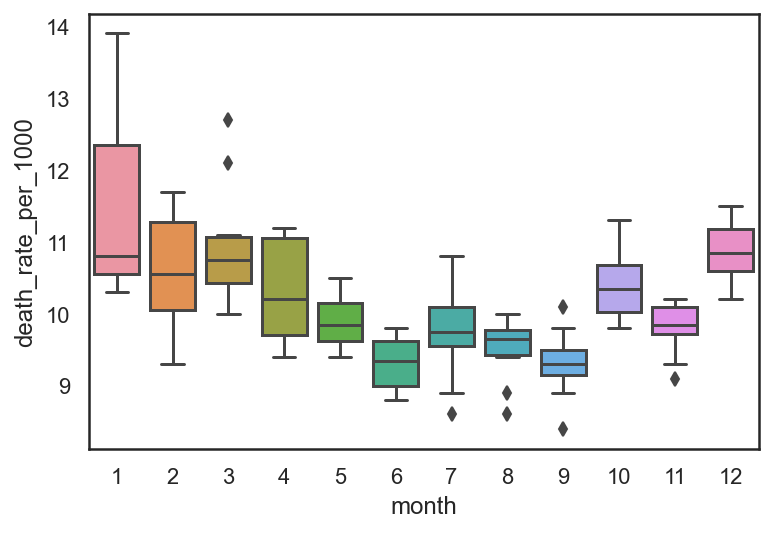

In [9]:
sns.boxplot(x='month', y='death_rate_per_1000', data=df);